In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data preprocessing and feature scaling
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Saving the model
import joblib


In [ ]:
from google.colab import files
import pandas as pd

# Upload the CSV file
uploaded = files.upload()



Saving ObesityDataSet_raw_and_data_sinthetic.csv to ObesityDataSet_raw_and_data_sinthetic.csv


In [ ]:
import pandas as pd


data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')




In [ ]:
print(data.head())

    Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.0   no    no   2.0   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  3.0  yes   yes   3.0   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  3.0   no    no   2.0   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  3.0   no    no   2.0   
4  22.0    Male    1.78    89.8   Sometimes   no   2.0  1.0   no    no   2.0   

  family_history_with_overweight  FAF  TUE       CAEC                 MTRANS  \
0                            yes  0.0  1.0  Sometimes  Public_Transportation   
1                            yes  3.0  0.0  Sometimes  Public_Transportation   
2                            yes  2.0  1.0  Sometimes  Public_Transportation   
3                             no  2.0  0.0  Sometimes                Walking   
4                             no  0.0  0.0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Norm

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [ ]:
print(data.isnull().sum()) # Handling the missing values

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [ ]:
# Convert categorical columns to numerical (example)
data = pd.get_dummies(data, drop_first=True)



In [ ]:
print(data.columns)


Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Male', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no',
       'FAVC_yes', 'SCC_yes', 'SMOKE_yes',
       'family_history_with_overweight_yes', 'CAEC_Frequently',
       'CAEC_Sometimes', 'CAEC_no', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
       'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
       'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop(['NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
               'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
               'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II'], axis=1)

# Define the target variable (combine one-hot encoded columns into a single target)
y = data[['NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
          'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
          'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II']].idxmax(axis=1)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (1688, 23)
X_test shape: (423, 23)
y_train shape: (1688,)
y_test shape: (423,)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7163120567375887
Classification Report:
                                precision    recall  f1-score   support

      NObeyesdad_Normal_Weight       0.89      0.87      0.88       118
     NObeyesdad_Obesity_Type_I       0.64      0.36      0.46        78
    NObeyesdad_Obesity_Type_II       0.67      0.91      0.77        58
   NObeyesdad_Obesity_Type_III       0.84      1.00      0.91        63
 NObeyesdad_Overweight_Level_I       0.54      0.61      0.57        56
NObeyesdad_Overweight_Level_II       0.48      0.44      0.46        50

                      accuracy                           0.72       423
                     macro avg       0.68      0.70      0.68       423
                  weighted avg       0.71      0.72      0.70       423



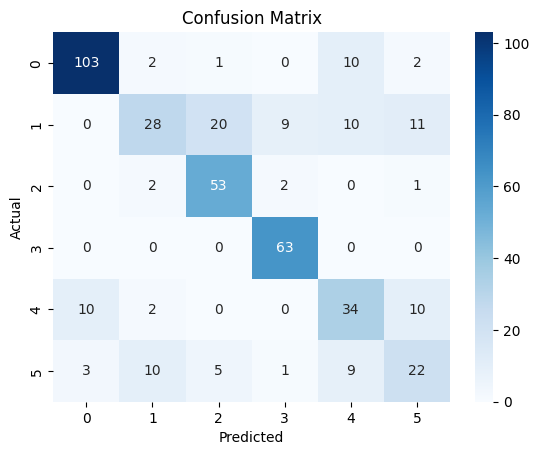

In [ ]:
# @title
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
import joblib

joblib.dump(model, 'obesity_model.pkl')


['obesity_model.pkl']

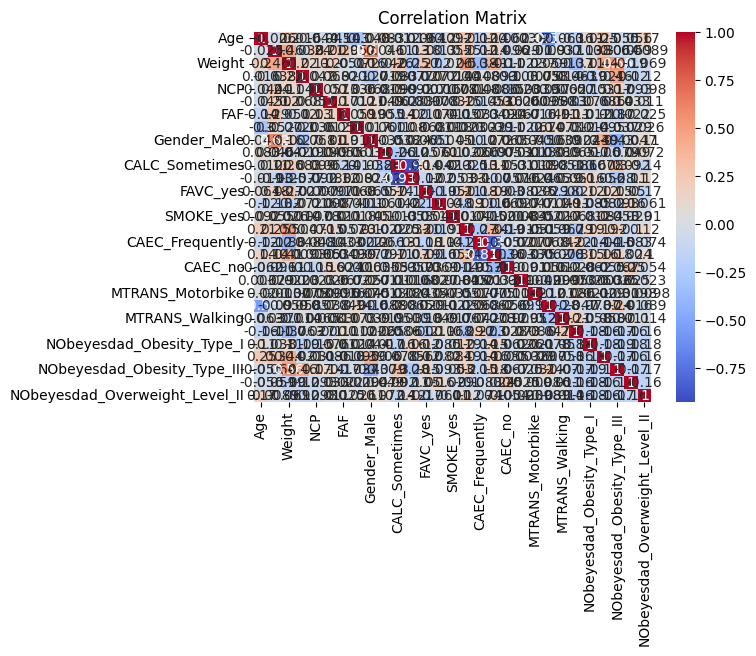

In [ ]:
# @title
import seaborn as sns

corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


Clustering Analysis of Obesity

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select relevant features (exclude one-hot encoded target columns)
features = data.drop(['NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I',
                      'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III',
                      'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II'], axis=1)

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


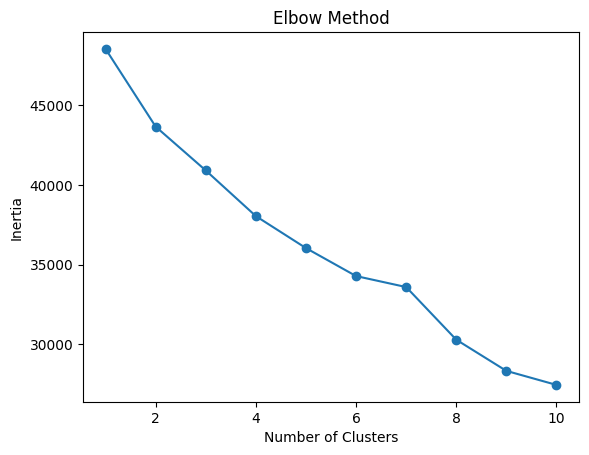

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Find the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


RandomForestClassifier Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report:\n", classification_report(y_test, rf_predictions))


Random Forest Accuracy: 0.9550827423167849
Classification Report:
                                 precision    recall  f1-score   support

      NObeyesdad_Normal_Weight       0.94      0.97      0.95       118
     NObeyesdad_Obesity_Type_I       0.97      0.95      0.96        78
    NObeyesdad_Obesity_Type_II       0.97      0.98      0.97        58
   NObeyesdad_Obesity_Type_III       1.00      1.00      1.00        63
 NObeyesdad_Overweight_Level_I       0.91      0.88      0.89        56
NObeyesdad_Overweight_Level_II       0.94      0.94      0.94        50

                      accuracy                           0.96       423
                     macro avg       0.95      0.95      0.95       423
                  weighted avg       0.96      0.96      0.95       423



using neural networks

In [ ]:
pip install tensorflow


In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Encode target variable to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert integer-encoded target variable to categorical
y_train_cat = to_categorical(y_train_encoded)
y_test_cat = to_categorical(y_test_encoded)

# Verify the encoding
print("Classes:", label_encoder.classes_)
print("y_train_cat shape:", y_train_cat.shape)
print("y_test_cat shape:", y_test_cat.shape)

# Build the Neural Network model
nn_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(y_train_cat.shape[1], activation='softmax')  # Output layer
])

# Compile the model
nn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
nn_model.fit(X_train, y_train_cat, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
nn_loss, nn_accuracy = nn_model.evaluate(X_test, y_test_cat)
print("Neural Network Accuracy:", nn_accuracy)


Classes: ['NObeyesdad_Normal_Weight' 'NObeyesdad_Obesity_Type_I'
 'NObeyesdad_Obesity_Type_II' 'NObeyesdad_Obesity_Type_III'
 'NObeyesdad_Overweight_Level_I' 'NObeyesdad_Overweight_Level_II']
y_train_cat shape: (1688, 6)
y_test_cat shape: (423, 6)
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1928 - loss: 7.0158 - val_accuracy: 0.2485 - val_loss: 2.6895
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1775 - loss: 3.8329 - val_accuracy: 0.3609 - val_loss: 1.8992
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2862 - loss: 2.4113 - val_accuracy: 0.3698 - val_loss: 1.6854
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2886 - loss: 2.1369 - val_accuracy: 0.3846 - val_loss: 1.5275
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3071 - loss: 1.8097 - val_accuracy: 0.3846 - val_loss: 1.4741
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3536 - loss: 1.7054 - val_accuracy: 0.3521 - val_loss: 1.4243
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3644 - loss: 1.6437 - val_accuracy: 0.4172 - val_loss: 1.3633
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3811 - loss: 1.5470 - val_accuracy: 0.4497 - val_loss: 1.3001
Epo

Comparing Model Performance

In [ ]:
from sklearn.metrics import accuracy_score

# Ensure y_test is in integer-encoded format
# (y_test_encoded was created earlier during preprocessing with LabelEncoder)
y_test_labels = y_test_encoded  # Already integer-encoded
from sklearn.metrics import accuracy_score

# Ensure predictions are in the correct format
# Random Forest, XGBoost, and LightGBM predictions are already in label format

# Neural Network predictions: Convert one-hot encoded predictions back to labels
nn_predictions = nn_model.predict(X_test)
nn_predictions_labels = nn_predictions.argmax(axis=1)  # Get the class with the highest probability

# Convert y_test_cat back to labels for comparison
y_test_labels = y_test_encoded  # Already integer-encoded during preprocessing

# Print accuracy scores
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_predictions)}")

print(f"Neural Network Accuracy: {accuracy_score(y_test_labels, nn_predictions_labels)}")






14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Random Forest Accuracy: 0.9550827423167849
Neural Network Accuracy: 0.7375886524822695
